In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
import scipy.cluster.hierarchy as sch

In [10]:
data = pd.get_dummies(data, columns=["Genre"], drop_first=True)



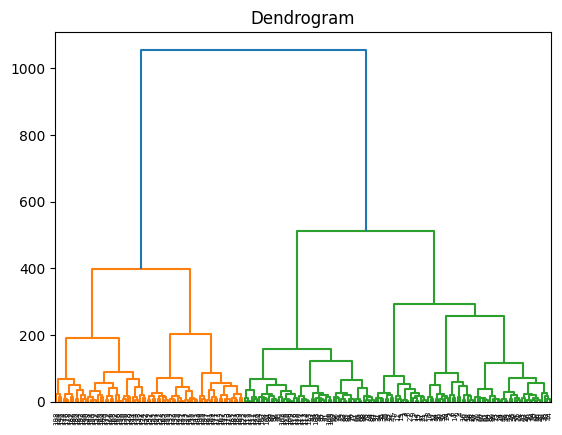

In [11]:
import matplotlib.pyplot as plt
dend=sch.dendrogram(sch.linkage(data,method="ward"))
plt.title("Dendrogram")
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage="average")


In [13]:
x=data[["Annual_Income_(k$)","Spending_Score"]].values
model.fit(x)
y_hc=model.fit_predict(x)

model.clusters_

In [14]:
model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4])

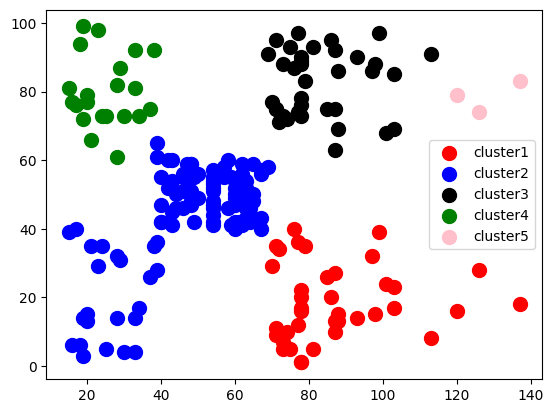

In [15]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='red', label='cluster1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='blue', label='cluster2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='black', label='cluster3')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='green', label='cluster4')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='pink', label='cluster5')

plt.legend()
plt.show()


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)


KMeans(n_clusters=5, random_state=42)

In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, y_hc)
print("Silhouette Score:", score)


Silhouette Score: 0.4791911539647448


Hierarchical clustering successfully segmented mall customers into meaningful groups based on income and spending behavior, helping businesses design targeted marketing strategies and improve customer satisfaction.

In [18]:
import os
print(os.getcwd())


D:\Python\Mall_Customer_hierarchical\notebooks


In [19]:
import os
os.makedirs('../images', exist_ok=True)

plt.savefig('../images/dendrogram.png')
plt.show()


<Figure size 640x480 with 0 Axes>

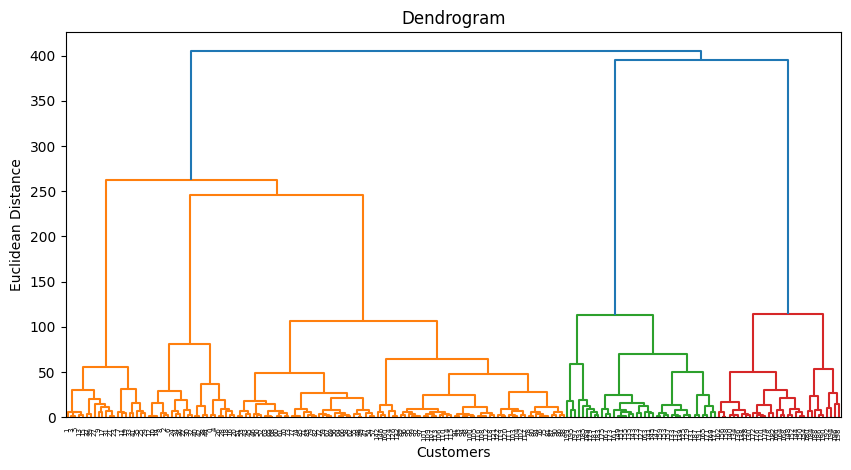

In [21]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import os

os.makedirs('../images', exist_ok=True)

plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

plt.savefig('../images/dendrogram.png')  # SAVE BEFORE show()
plt.show()


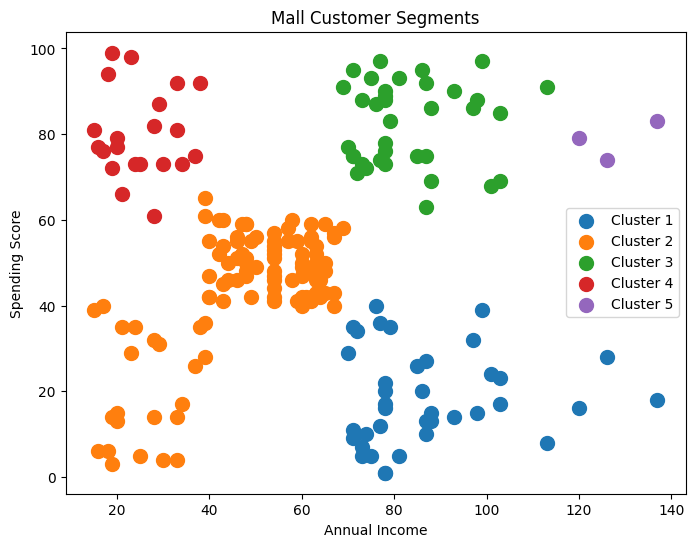

In [23]:
import matplotlib.pyplot as plt
import os

os.makedirs('../images', exist_ok=True)

plt.figure(figsize=(8,6))

plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, label='Cluster 1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, label='Cluster 2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, label='Cluster 3')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, label='Cluster 4')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, label='Cluster 5')

plt.title('Mall Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.savefig('../images/clusters.png')   # SAVE AFTER plotting
plt.show()

